In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stereo_matching(img_left, img_right, window_size=5, disparity_range=100):
    # 转换为灰度图像
    if len(img_left.shape) > 2:
        img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    if len(img_right.shape) > 2:
        img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    height, width = img_left.shape

    # 定义一个空的视差图像
    disparity = np.zeros_like(img_left)

    # 计算每个像素点的视差
    half_window = window_size // 2
    for y in range(half_window, height - half_window):
        for x in range(half_window, width - half_window):
            # 选择左图像中的一个窗口
            window_left = img_left[y - half_window : y + half_window + 1, x - half_window : x + half_window + 1]

            # 初始化最小匹配成本和最佳视差
            min_cost = np.inf
            best_disparity = 0

            # 在一定的视差范围内搜索右图像
            for d in range(disparity_range):
                # 确定右图像中对应窗口的位置
                x_right = x - d
                if x_right < half_window:
                    break

                # 选择右图像中的一个窗口
                window_right = img_right[y - half_window : y + half_window + 1, x_right - half_window : x_right + half_window + 1]

                # 计算匹配成本
                cost = np.sum(np.abs(window_left - window_right))

                # 如果匹配成本更小，则更新最小匹配成本和最佳视差
                if cost < min_cost:
                    min_cost = cost
                    best_disparity = d

            # 将最佳视差存储在视差图像中
            disparity[y, x] = best_disparity

    return disparity

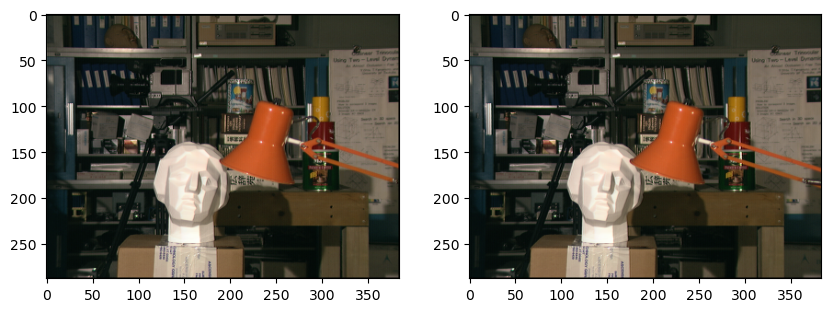

In [3]:
imgL = cv2.imread('./images/imL.png')
imgR = cv2.imread('./images/imR.png')

plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.imshow(imgL[:,:,::-1])

plt.subplot(1, 2, 2)
plt.imshow(imgR[:,:,::-1])

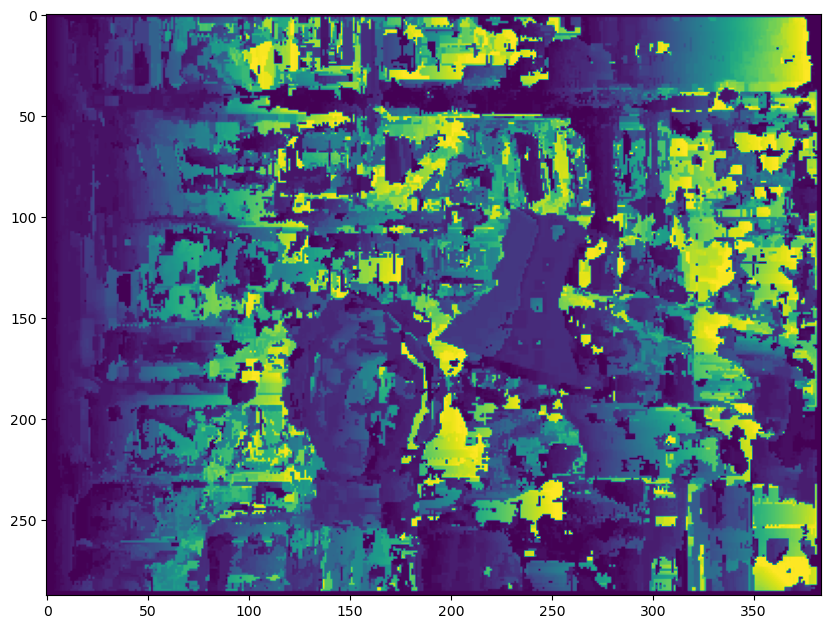

In [4]:
stereo = stereo_matching(imgL, imgR)
plt.figure(figsize=(10,20))
plt.imshow(stereo)